In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns


In [113]:
df = pd.read_csv('height_weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


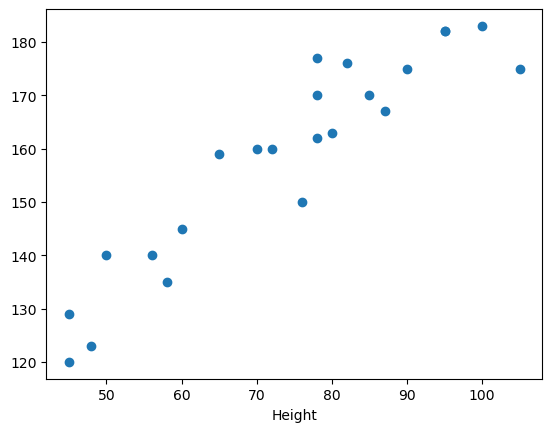

In [76]:
# plotting the data in scatter
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.xlabel('Height')
plt.show()

In [77]:
# finding the co-relation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


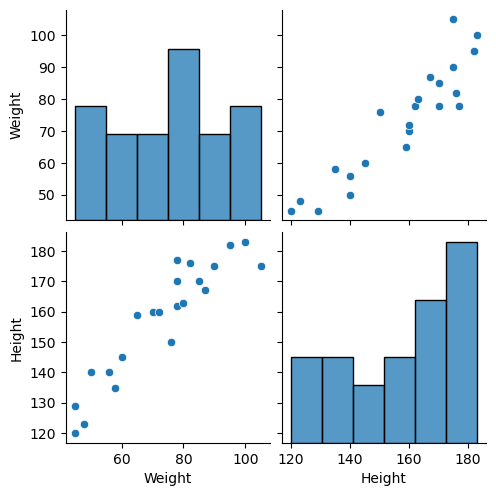

In [78]:
sns.pairplot(df)

In [82]:
# let's break the data into independent and dependent feature
# weight is independent and height is dependent
x = df[['Weight']] # independent feature
y = df['Height'] #dependent feature
# note make sure that all the indenpendent feature should be in 2D array
# dependent feature can be series or 1D array

In [83]:
# now split the train and test data 
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [87]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [88]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [89]:
# let's implement the simple linear regression 
from sklearn.linear_model import LinearRegression

In [90]:
regression = LinearRegression(n_jobs=-1)

In [92]:
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [93]:
slope = regression.coef_
# this is slope
# y = c + mx (m = regression.coef) 
#  c = intercept
intercept = regression.intercept_
print(f"Coffieent: {slope}")
print(f"Intercept: {intercept}")

Coffieent: [17.2982057]
Intercept: 156.47058823529412


In [94]:
# predicated value
regression.predict(x_train)

array([141.30649667, 185.31934779, 162.26499721, 130.82724641,
       180.07972266, 127.68347133, 143.40234673, 153.88159699,
       160.16914715, 132.92309646, 139.21064662, 155.97744705,
       174.84009753, 166.45669731, 169.60047239, 171.69632245,
       164.36084726])

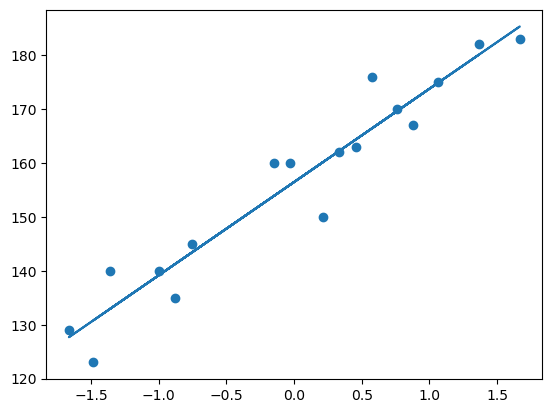

In [95]:
# plotting the x_train data and y_train data
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [99]:
# prediction for test data
# y_pred = intercept + cofficent(x_test)
#  y_pred = 156.47058823529412 + 17.2982057(x_test)
y_pred = regression.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

## Performance matrices
 Performance metrics in machine learning are quantitative tools that measure and evaluate a model's effectiveness on a given task, providing insights into its accuracy, precision, and reliability

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [98]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f"Mean Squared error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"Root Mean squared error: {rmse}")

Mean Squared error: 114.84069295228699
Mean absolute error: 9.665125886795005
Root Mean squared error: 10.716374991212605


## R squared
R^2 = 1 - SSR/SST

In [102]:
from sklearn.metrics import r2_score


In [103]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [106]:
# OLS linear regression
import statsmodels.api as sm 

In [107]:
model = sm.OLS(y_train,x_train).fit()

In [108]:
prediction = model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [110]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 12 Sep 2025   Prob (F-statistic):                       0.664
Time:                        23:07:16   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# how to make prediction for new data
weight = 60 
# for this weight predict the height
pr_height = regression.predict(scaler.transform([[weight]]))
print(f"Height:{pr_height}")
# here we can see the if the person weight is 60 height is 143

Height:[143.40234673]


/Volumes/Demo/100-days-/day_54/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
